**Import the libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style= 'darkgrid')

**Load the dataset**

In [8]:
df=pd.read_csv("revenue_prediction.csv")

In [9]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


**Examining missing values in a dataset**

In [10]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

## Simple Linear Regression

**Revenue Prediction using only `Order_place`**

In [11]:
df1=df.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])

In [12]:
df1.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [13]:
df1.shape

(100, 2)

**Create independent feature and dependent variable**

In [17]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values  

**Split the dataset into Training set and Test set**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print(x_train)

[[ 6.8]
 [ 1.9]
 [ 2.1]
 [ 4.8]
 [ 3.3]
 [ 3.1]
 [ 6.7]
 [ 6.3]
 [ 5.3]
 [ 2.4]
 [ 5. ]
 [ 7.7]
 [ 7.2]
 [ 4.6]
 [ 3.3]
 [ 4.9]
 [ 1.7]
 [ 1.6]
 [ 3.6]
 [10.8]
 [ 8.5]
 [ 4. ]
 [ 4.3]
 [ 1.1]
 [ 5.3]
 [ 1.9]
 [ 3.9]
 [ 3.6]
 [ 5.1]
 [ 4.7]
 [ 8.8]
 [ 2.5]
 [ 8.1]
 [ 5.3]
 [ 4.8]
 [ 3.5]
 [ 5. ]
 [ 2.4]
 [ 2.8]
 [ 2.1]
 [ 2.1]
 [ 4.4]
 [ 4.5]
 [ 2.6]
 [ 1.9]
 [ 3.8]
 [ 4.1]
 [ 3.6]
 [ 4.2]
 [ 6.2]
 [ 6.1]
 [ 4.4]
 [ 2.9]
 [ 7.1]
 [ 2.1]
 [ 3.1]
 [13. ]
 [ 3.1]
 [ 3.5]
 [ 3.4]
 [ 1.5]
 [ 3.9]
 [ 2.6]
 [ 3.3]
 [ 6.8]
 [ 1.6]
 [ 1. ]
 [ 1.9]
 [ 2.8]
 [ 5.8]
 [ 1.9]
 [ 5.1]
 [ 3.1]
 [ 3.6]
 [ 5.4]
 [ 3. ]
 [ 4. ]
 [ 1.8]
 [ 6.5]
 [ 3.1]]


In [20]:
print(x_test)

[[5.7]
 [5.4]
 [3.8]
 [3.6]
 [4. ]
 [3.7]
 [3.8]
 [3.5]
 [3.6]
 [5.5]
 [5.2]
 [2.9]
 [3.1]
 [2.2]
 [3.3]
 [4.2]
 [4.3]
 [1.7]
 [1.6]
 [1.9]]


In [21]:
print(y_train)

[ 6941173  2025297  2967425  4952255  3452382  3918918  6836483  6412623
  4544227  2525375  3861370  7865428  7495092  7705945  3410878  4517319
  1882131  1756069  3903884 19696939  8630682  4100886  6491607  1270499
  6135276  1521934  4066618  2778621  5286212  5107746  7904084  2175511
  7513524  5461700  5152497  3871344  5966635  2551252  3028267  2364478
  2390534  4567678  4651866  2732645  2156098  4052733  4250758  3836721
  4350573  6694797  6313221  4554237  3004429  7201784  2344689  3258837
 16549064  3261924  3753720  3600467  1619683  4250553  2740687  2447890
  7223131  1763231   849870  2555379  1999068  5906596  2083447  5500818
  3351383  3807496  5025735  3164972  4136425  1099097  6782425  3273041]


In [22]:
print(y_test)

[5966193 5595267 3982767 3752885 4264176 3818055 4956086 3727364 3945135
 5953753 4937526 2408199 3347767 2371202 3426169 4816715 4590423 1904842
 2234634 2358644]


**Training the Simple Linear Regression model on the Training set**

In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Predicting the Test set results**

In [24]:
y_pred=regressor.predict(x_test)

In [25]:
y_pred

array([6351103.23642516, 5984998.65773576, 4032440.90472562,
       3788371.18559936, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559936,
       6107033.5172989 , 5740928.93860949, 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

**Visualising the Training set results**

Text(0, 0.5, 'Revenue')

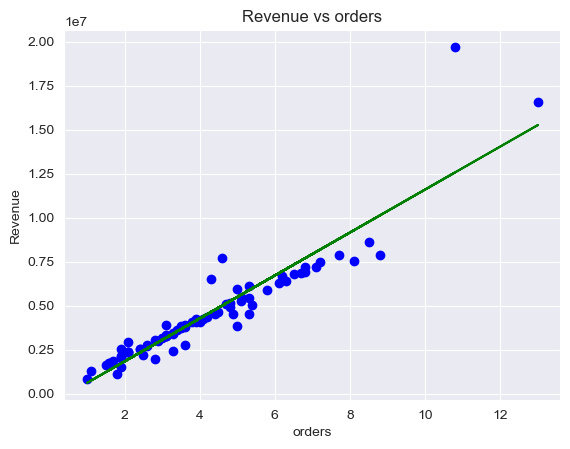

In [26]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")



**Visualising the Test set results**

Text(0, 0.5, 'Revenue')

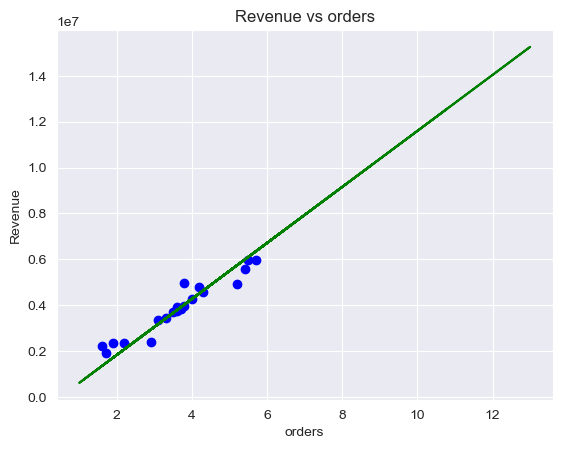

In [27]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

**Accuracy of the Model**

In [28]:
from sklearn.metrics import r2_score

In [29]:
score=r2_score(y_pred,y_test)

In [30]:
score

0.9109612329066814

## Multiple Linear Regression

In [31]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [34]:
df = df.drop(columns=['Id', 'Name'])

In [36]:
cat_cols = df.select_dtypes(include='object').columns

In [46]:
num_cols = df.select_dtypes(exclude='object').columns[:-1]
num_cols

Index(['No_Of_Item', 'Order_Placed'], dtype='object')

In [47]:
x = df.drop(columns = ['Revenue'])
y = df['Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

sc = StandardScaler()
ohe = OneHotEncoder(drop='first')

ct = ColumnTransformer(transformers=[('onehot', ohe, cat_cols),
                                    ('scaler', sc, num_cols)],
                      remainder='passthrough')

In [52]:
x = ct.fit_transform(x).toarray()


In [53]:
y = df['Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=regressor.predict(x_test)

In [56]:
y_pred

array([4749082.24453836, 5795481.3651941 , 3624122.71347809,
       5287081.1425763 , 4718418.05369512, 3653068.1855904 ,
       3520725.7135514 , 3278346.66184147, 3943685.13775996,
       6601999.69793165, 5305648.63833409, 3321019.20816335,
       2583628.88867206, 1933505.67621785, 4072204.56875623,
       4277740.43799813, 4042368.65483386, 1081690.61394254,
       -263534.05156489,  126746.08337245])

In [58]:
score=r2_score(y_pred,y_test)
score

0.6433387909260776

## Observations
- Only `Order_place` is helful for predicting `Revenue`.